# Введение в искусственные нейронные сети
# Часть 2. Keras

https://www.tensorflow.org/api_docs/python/tf

---

* Средство для решения задачи моделирования нейронных сетей.

* Сейчас входит в состав Tensorflow (c 2019 г.)

* Models: контейнер, поддерживающий ту схему, которую мы хотим создать в нейронной сети. Это все структура - граф вычислений. Слои - элементы графа. (Sequntial и Functional API)
* Layers: слои (элементы Models), бывают сверточные, рекурентные, полносвязные и служебные.
* Preprocessing: utils, обрабобка изображений, обработка текстов.

* Слой не содержит активационную функцию. Слой нейронов это чисто веса оказывается!!!!!!!!! Активация - это доп. слои!!!

* batch_size - размер пакета, который мы будет использовать при обучении. Данные могут быть большие и сделать обратное распространение ошибки это очень сложная и дорогая операция. Поэтому мы делим данные на блоки (батчи) и просматриваем адаптацию по каждому отдельному батчу (минипакетная обработка - стохастический метод :) )

* Validation_split - задается как пропорция относительно того какую часть мы будет использовать для валидации.

---

Оптимизаторы:

- SGD - стохастический Градиентный спуск, но сходимость не крутая у него. Надо балансировать скорость обучения и ресурсы
- SGD + Momentum - позволяет не дергаться (как в обычном SGD), а сохранять направление. Направление скорости + градиент, типо сглаживание направления и нет такого что мы пойдем обратно. Надо загуглить Nesterov Momentum.

Momentum вводит новый параметр: память


- RMSProp 
- Adam - метод адаптивных моментов, когда мы выбираем не только НАПРАВЛЕНИЕ, но и скорость обучения изменяем в зависимости от того как у нас были обучены предыдущие шаги (память)
- Nesterov Adam
- Еще есть алгоритмы высоких порядков: BFGS (использует 2ые частные производные) - нужно хорошее железо

---

Резюме:
* Универсального алгоритма нет
* Параметры нужно подбирать 
* Делаем несколько экспериментов в каждой конфигурации

---

## Содержание:


<ol>
<li>Способы создания нейросетей</li>
<li>Что такое Keras</li>
<li>Основы синтаксиса</li>
<li>Простая нейросеть на Keras</li>
</ol>

## Способы создания нейросетей

Нейросети это математические модели. Программирую на любом языке можно решать задачи связанные с математикой. Однако встает вопрос какой язык подойдет для этого больше? Не считая учебных нейросетей, нейросети как правило работают с большим количеством данных. Поэтому, чтобы обучение нейросетей происходило с приемлимой скоростью нужно использовать быстрый язык. Например Си. Но так как язык Си это язык с низким уровнем абстракции то программировать и модифицировать на нем нейросети было бы крайне затруднительно. 

Хорошо может подойти для этих целей язык Python. Так как он с одной стороны имеет высокий уровень абстракции с другой стороны операции с массивами данных могут сделать его библиотеки написанные на Си. Таким способом мы пользовались на первых 2 уроках. Однако если писать нейросети таким образом то будет много повторяющегося кода поскольку архитектуры нейросетей остаются одинаковыми и зачастую у них только меняются параметры. Кроме этого нам может понадобиться хорошо знать архитектуры самых разных нейронных сетей чтобы реализовать их вручную. Работа таким образом затруднительна для людей не имеющих достаточной подготовки, а для имеющих может быть нааборот рутиной.

Существуют фреймворки для созданий нейронных сетей. Они являются, пожалуй основным рабочим способом создания нейронных сетей. Вот их неполный перечень:

1. TensorFlow
2. PyTorch
3. Keras
4. Microsoft Cognitive Toolkit (CNTK)
5. Caffe
6. Apache MXNet

Упрощение создания нейронных сетей не заканчивается на этих фреймворках. Существуют инструменты которые позволяют создавать нейронные сети без навыков программирования, строя нейросети графически. Примеры: Neural Designer, Deep Learning Studio.

Но и на этом не заканчиваются способы создания нейросетей. Существуют инструменты самостоятельно создающие нейронные сети. Это так называемые AutoML инструменты. Вот примеры популярных из них:
1. MLBox
2. TPOT
3. Autokeras

Как вы возможно заметили что все эти инструменты отранжированы походы изложения в порядке возрастания уровня абстракции. Соответсвенно говоря о плюсах минусах того или иного инструмента мы должны понимать в принципе плюсы минусы повышения уровня абстракции. Чем он выше тем меньше производительность и тем меньше его гибкость и набоорот.

Как уже было сказано наиболее востребованных в рабочих целях является тот уровень абстракции, который дают фреймворки. Будем изучать дальше и пользовать ими. Остается сделать выбор среди них. Самый популярный фреймворк для создания нейросетей TensorFlow. Самый популярный для обучения - Keras. На этом уроке мы изучим с вами Keras, а на следующим TensorFlow. Также стоит отметить, что эти фреймворки взаимосвязаны - Keras как правило работает поверх TensorFlow, а сам TensorFlow позволяет пользовать средствами Keras при необходимости.


## Что такое Keras

Keras появился относительно недавно - в 2015 г. Но за это время стал одним из самых популярных фреймоворков для создания нейросетей и фактически стандартом для использования его начинающими.

В чем причина его популярности? Keras позволяет создовать на высоком уровне абстракции. Т.е. на не нужно вручную реализовать с помощью математикаподобного кода те или иные элементы нейронной сети. Мы можем оперировать слоями, количеством нейронов в них, выбором функции активации и т.д. В тоже время keras содержит инструментарий для всего того, что может понадобиться для работы - например ряд встроенных датасетов, возможность обрабатывать изображения.

В техническом плане Keras это оболочка над инструментами меньшей степени абстракции. На выбор он может работать поверх TensorFlow, Microsoft Cognitive Toolkit, R, Theano, PlaidML.

Keras пользуется также на соревнованиях Kaggle.

Однако стоит отметить, что в реальных проектах чаще используется TensorFlow, который мы будем изучать в след. уроках.

Keras как и любой высокобастрактный инструмент имеет изъяны в качестве меньшей гибкостью и производительснотью чем тот же tensorflow.

Стоит также отметить, что Google официально поддерживает Keras, его автор François Chollet, является сотрудником Google. TensorFlow сам в свою очередь позволяет использовать возможности Keras, т.е. в нем заложена возможность переходить на более высокой уровень абстракции.

В данном уроке мы с вами рассмотрим пример обучения нейронной сети с помощью Keras. Но прежде давайте посмотрим на основы синтаксиса Keras и стандартные задачи, которые нужно выполнить при обучении нейронной сети.

## Основы синтаксиса

**Установка и работа с данными**

Для начала необходимо установить keras. Надо полагать вы хорошо знакомы с командой pip.

sudo python3 pip install keras

Давайте попробуем получить датасет mnist и проанализировать его содержимое.
Это еще не будет синтаксис Keras, но это часто встречающаяся задача. Не обращайте внимание на предупреждения от TensorFlow. Их часто бывает много и их можно подавить при необходимости.

    import numpy as np
    import mnist
    import keras

    # The first time you run this might be a bit slow, since the
    # mnist package has to download and cache the data.
    train_images = mnist.train_images()
    train_labels = mnist.train_labels()

    print(train_images.shape) # (60000, 28, 28)
    print(train_labels.shape) # (60000,)

Что в данном случае мы смогли с вами узнать? Что тренировочный датасет mnist состоит из 60000 изображений 28 на 28 пикселей. Такие небольшие датасеты с маленькими изображениями встретятся вам и в других учебных датасетах.

Что нам нужно делать теперь? Если скаченный нами датасет не имеет разделения на тренировочный и тестовый то поделить их. В нашем случае наш тренировочный датасет состоит из 60 000 изображений и тестовый из 10 000 и они поделены по умолчанию.

Нам теперь нужно конверитировать значения пикселей из вида от 1 до 255 в набор значений от -0.5 до 0.5.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist, boston_housing, fashion_mnist # наборы для работы
# import tensorflow as tf
# import tf.keras as keras

(train_imagesi, train_labels), (test_imagesi, testn_labels) = mnist.load_data()

# Normalize the images.
train_imagesi = (train_imagesi / 127) - 1
test_imagesi = (test_imagesi / 127) - 1 

# Flatten the images
train_images = train_imagesi.reshape((-1, 784))
test_images = test_imagesi.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

Using TensorFlow backend.
C:\Users\kikoooiemama\anaconda3\envs\start_nn\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kikoooiemama\anaconda3\envs\start_nn\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kikoooiemama\anaconda3\envs\start_nn\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\kikoooie

(60000, 784)
(10000, 784)


Данные конечно нужно представить в виде векторов. Вектор длиной 784 (28*28)

In [2]:
# import numpy as np
# import mnist

# train_images = mnist.train_images()
# train_labels = mnist.train_labels()
# test_images = mnist.test_images()
# test_labels = mnist.test_labels()

# # Normalize the images.
# train_images = (train_images / 255) - 0.5
# test_images = (test_images / 255) - 0.5

# # Flatten the images.
# train_images = train_images.reshape((-1, 784))
# test_images = test_images.reshape((-1, 784))

# print(train_images.shape) # (60000, 784)
# print(test_images.shape)  # (10000, 784)

Изображение 28х28 пикселей

In [3]:
n = 1
train_imagesi[n, :, :].shape

(28, 28)

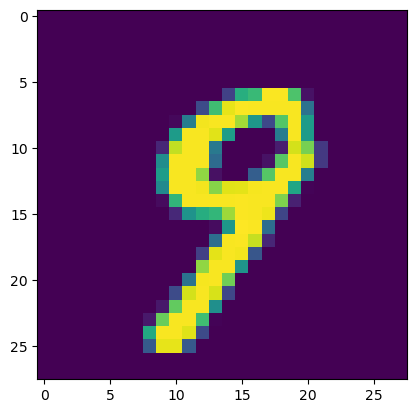

Label: 9


In [4]:
n = 2501
plt.imshow(train_imagesi[n, :,:])
plt.show()
print(f"Label: {train_labels[n]}")

Проверяем keras:

In [5]:
keras.backend.backend()

'tensorflow'

Labels:

In [6]:
train_labels[:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

In [7]:
train_images[202, 150:160]

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -0.90551181, -0.80314961, -0.80314961, -0.80314961, -0.80314961])

**Создание модели**

После первичной подготовки данных дальше как правило следует создание модели нейронной сети, которая будет учиться на этих данных.

Ниже типичный код учебной нейросети - 

    # define the keras model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

Давайте разберемся с теми командами, которые нам встетились в этом коде.

Sequential - позволяет создать нейросети где слои имеют форму стека. Сигнал в них передается от одного слоя к другому. В противовес этой разновидности есть нейросети где сигнал может не сразу передаваться в следующий слой а попадать в цикл. Такие нейросети мы разберем в следующих уроках.

Dense (Полносвязный слой)- позволяет каждому нейронну быть связанному с другим нейронном. В противовес этом может быть необходимость не делать так много связей. Неполносвязнные архитектуры мы также разберем на этом курсе, они основа компьютерного зрения.

Цифры 12, 8, 1 обозначают количество нейронов в каждом конкретном слое

Activation - позволяет определить формулу по которой будет активироваться нейрон.

**Компиляция модели**

На этапе компиляции модель с заданными параметрами ранее создается. Вот типичный учебный пример:

    # создание keras модели
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Однако на этой стадии мы должны сделать еще некоторые настройки нейронной сети. Разберем команды из кода выше.

loss - позволяет задать формулы по которой будет определяться степень ошибки нейронной сети.

optimizer - позволяет задать алгоритм, который будет осуществлять изменения весов по всей нейронной сети (backpropagation)

metrics - позволяет опредилить кретирии по которым будет оцениваться степень обученности нейросети.

**Передача данных для обучения нейросети**

После того как нейросеть создана можно передавать ей данные для обучения. Ниже типичный пример кода для этого.

    # передача обучающего датасета keras модели
    model.fit(X, y, epochs=150, batch_size=10, verbose=0)

Разберем команды из этого примера.
X, y - содержат все обучающие данные
epochs - определяет сколько раз через нейросеть должен пройти весь набор данных
bath_size - определяет количество обучающих примеров передающихся нейросети на каждой итерации обучения.
verbose - позволяет определять информацию, котору вы видете во время обучения нейронной сети.

**Оценка обученности нейронной сети**

Следующей стадией может быть проверка обученности нейронной сети. Команда Keras для этих целей - 

    results = model.evaluate(x_test, y_test, batch_size=128)
    
В данном случае мы просто указываем какую модель на каких данных мы хотим проверить

**Запуск нейронной сети для выполнения работы**

На этой стадии мы можем попробовать запустить нейронную сеть на данных которые мы хотели бы чтобы она оценила. Осуществить распознования объекта на фотографии например.
Вот код для этих целей - 

    predictions = model.predict(x_test[:3])
    
В качестве аргумента здесь указывается массив даныхх содержащих, например фотографию в виде массива чисел.    
    

Мы с вами рассмотрели основные стадии процесса обучения нейросети и команды Keras, для этого. Безусловно здесь приведен далеко неполный перечень возможностей Keras. У Keras есть также возможность сохранять созданную нейросеть, запускать уже имеющиюся, различные средства для создания нейросетей разных архитектур и другое. С чем то из арсенала Keras мы с вами познакомимся по ходу курса, а с остальным вы можете познакомиться на сайте Keras в разделе документация.

![neuron.png](../images/02/neuron.png "neuron.png")

## Простая нейросеть на Keras

Давайте попрубуем сделать нейросеть на Keras использую полученные выше знания. Попробуем обучить нейросеть различать рукописные цифры.

In [8]:
# Код нейронной сети в Keras из вебинара!
#########################################

import numpy as np
from keras.models import Sequential
from keras.layers import Dense 
from keras.datasets import mnist
# from tensorflow.keras.utils import to_categorical 
from keras.utils import to_categorical # так как наши label encoding представления нас не устраивают 
from keras.models import load_model

Размер набора входных данных для обучения

In [9]:
train_images.shape, test_images.shape

((60000, 784), (10000, 784))

Собираем модель по слоям через .add()

In [10]:
model1 = Sequential(name='my_model')
model1.add(Dense(128, activation='relu', input_shape=(784,)))
# входной слой + полносвязный слой из 128 нейронов с активацией ReLU
# для входного слоя надо устанавливать количество входов input_shape=(784,) и по факту input_shape=(784,) это отдельный слой
for k in range(2):
    model1.add(Dense(10+(10-k)*10, activation='tanh'))
    # Скрытый слой k из 10+(10-k)*10 нейронов с активацией tanh
    
model1.add(Dense(10, activation='softmax'))
# выходной слой из 10 нейронов (сколько классов, столько и нейронов) + активация softmax
# цифры от 0 до 9 это наши классы

Важно! Внутренние слои никогда не бывают линейными!! 
**Отсылка к теореме Минского-Пайперта о том, что многослойный линейнный перцептрон эквивалентен однослойному линейному перцептрону**

Компилируем сеть с оптимизатором, функцией потерь и метрикой:

In [11]:
model1.compile(
    optimizer='adam',
    loss=keras.losses.CategoricalCrossentropy(), # ЛОГИСТИЧЕСКИЕ ПОТЕРИ
    metrics=['accuracy']
)

Оптимизаторы:

* SGD (с или без моментум)
* RMSprop()
* Adam() - адаптивные моменты
* Adagrad()

Функции потерь:

* CategoricalCrossentropy()
* SparseCategoricalCrossentropy()
* BinaryCrossentropy()
* MeanSquaredError()

Метрики: 
* CategoricalAccuracy()
* SparseCategoricalAccuracy()
* BinaryAccuracy()
* AUC()
* Precision()
* Recall()

Состав нашей модели:

In [12]:
model1.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 110)               14190     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               11100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 126,780
Trainable params: 126,780
Non-trainable params: 0
_________________________________________________________________


126,780 параметров в сети. Все будем обучать.

Как считать параметры слоя: (число входов нейрона + 1) * числов нейронов. Почему так? Потому что есть bias (сдвиги) у каждого нейрона по одному bias.

Например, для входов 5 и 10 нейронов в слое - число параметров будет 5х10 + 1x10 = 60 

Еще один способ создать линейную модель:

In [13]:
model = Sequential([
    Dense(128, activation='tanh', input_shape=(784,)),
    Dense(110, activation='tanh'),
    Dense(100, activation='tanh'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 110)               14190     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               11100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 126,780
Trainable params: 126,780
Non-trainable params: 0
_________________________________________________________________


Можно посмотреть как наша модель описана после ее создания:

In [15]:
model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_5',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 128,
    'activation': 'tanh',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_6',
    'trainable': True,
    'dtype': 'float32',
    'units': 110,
    'activation': 'tanh',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer'

Превратим входы в векторные (OHE в keras - from keras.utils import to_categorical)

In [16]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [17]:
y_t = to_categorical(train_labels)
y_tt = to_categorical(testn_labels)

In [18]:
y_t[:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Посмотрим на реакции модели до обучения - уже можно:) Но веса там рандомные.

In [19]:
y_pred = model.predict(test_images[:5,:])

In [20]:
y_pred[0,:]

array([0.20588475, 0.0763646 , 0.0498571 , 0.08613272, 0.04889206,
       0.02840744, 0.05364725, 0.07068431, 0.19013219, 0.18999754],
      dtype=float32)

In [21]:
y_class = np.argmax(y_pred, axis=1)
print(y_class)

[0 8 0 9 8]


Сделаем цикл тренировки модели

In [22]:
# Обучение
model1.fit(train_images[:,:], y_t[:,:], epochs=2, batch_size=32, validation_split=0.2)

# Оценка
model1.evaluate(test_images, y_tt)

# Предсказание на 5 тестовых
predictions = model1.predict(test_images[:5])

# Предсказание нашей модели
print(np.argmax(predictions, axis=1))

# Истинные значения
print(testn_labels[:5])

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 2s 48us/step - loss: 0.3211 - accuracy: 0.9019 - val_loss: 0.1955 - val_accuracy: 0.9421
Epoch 2/2
10000/10000 [==============================] - 0s 14us/step
[7 2 1 0 4]
[7 2 1 0 4]


Работает :)

И можем еще один добавить (продолжаем от предшествующего состояния). 

Обучим другую модель:

In [23]:
model.fit(train_images, y_t, epochs=15, batch_size=1024, validation_split=0.2, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 1s 14us/step - loss: 0.8169 - accuracy: 0.7751 - val_loss: 0.3504 - val_accuracy: 0.9000
Epoch 2/15
48000/48000 [==============================] - 1s 12us/step - loss: 0.3005 - accuracy: 0.9128 - val_loss: 0.2494 - val_accuracy: 0.9252
Epoch 3/15
48000/48000 [==============================] - 1s 13us/step - loss: 0.2246 - accuracy: 0.9341 - val_loss: 0.2098 - val_accuracy: 0.9381
Epoch 4/15
48000/48000 [==============================] - 1s 12us/step - loss: 0.1808 - accuracy: 0.9476 - val_loss: 0.1624 - val_accuracy: 0.9542
Epoch 5/15
48000/48000 [==============================] - 1s 12us/step - loss: 0.1463 - accuracy: 0.9575 - val_loss: 0.1475 - val_accuracy: 0.9567
Epoch 6/15
48000/48000 [==============================] - 1s 11us/step - loss: 0.1226 - accuracy: 0.9649 - val_loss: 0.1370 - val_accuracy: 0.9605
Epoch 7/15
48000/48000 [==============================] - 1s 11us/st

Сохраним модель на диск:

In [24]:
model.save_weights('../models/02/model.h5')

Загрузить веса модели:

In [25]:
# model.load_weights('../models/02/model.h5')

И еще потренируем (вернемся к прошлой модели 1):

In [26]:
# Обучение
hh = model1.fit(train_images, to_categorical(train_labels), epochs=15, batch_size=1024, validation_split=0.2)

# Оценка
model1.evaluate(test_images, to_categorical(testn_labels))

# Предсказание на 5 тестовых
predictions = model1.predict(test_images[:5])

# Предсказание нашей модели
print(np.argmax(predictions, axis=1))

# Истинные значения
print(testn_labels[:5])

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 1s 11us/step - loss: 0.0973 - accuracy: 0.9714 - val_loss: 0.1038 - val_accuracy: 0.9695
Epoch 2/15
48000/48000 [==============================] - 1s 11us/step - loss: 0.0778 - accuracy: 0.9774 - val_loss: 0.0997 - val_accuracy: 0.9712
Epoch 3/15
48000/48000 [==============================] - 1s 11us/step - loss: 0.0728 - accuracy: 0.9785 - val_loss: 0.0976 - val_accuracy: 0.9707
Epoch 4/15
48000/48000 [==============================] - 1s 11us/step - loss: 0.0698 - accuracy: 0.9794 - val_loss: 0.0957 - val_accuracy: 0.9715
Epoch 5/15
48000/48000 [==============================] - 1s 11us/step - loss: 0.0671 - accuracy: 0.9803 - val_loss: 0.0950 - val_accuracy: 0.9722
Epoch 6/15
48000/48000 [==============================] - 1s 12us/step - loss: 0.0646 - accuracy: 0.9813 - val_loss: 0.0949 - val_accuracy: 0.9716
Epoch 7/15
48000/48000 [==============================] - 1s 11us/st

Посмотрим на возвращаемый словарь hh.history (там результаты по эпохам для потерь и метрик по обучению и тестам)

In [27]:
hh.history

{'val_loss': [0.10384594198067983,
  0.09966580879688262,
  0.09759347629547119,
  0.09574442422389984,
  0.09497039167086284,
  0.09491489442189535,
  0.09324339207013448,
  0.09276394399007161,
  0.09252824620405833,
  0.0921068666378657,
  0.09038973180452983,
  0.09078330862522126,
  0.08982762400309245,
  0.08979044524828593,
  0.08883635989824931],
 'val_accuracy': [0.9695000052452087,
  0.9711666703224182,
  0.9706666469573975,
  0.9714999794960022,
  0.9722499847412109,
  0.9715833067893982,
  0.971666693687439,
  0.9723333120346069,
  0.9724166393280029,
  0.9728333353996277,
  0.9734166860580444,
  0.9733333587646484,
  0.9739999771118164,
  0.9738333225250244,
  0.9733333587646484],
 'loss': [0.09732178517182669,
  0.07777716952562332,
  0.07282277884085973,
  0.06978010662396748,
  0.06707969319820405,
  0.06461969778935114,
  0.06242051847775777,
  0.06044947725534439,
  0.05869735535979271,
  0.0570451975663503,
  0.05520636696616808,
  0.05364431669314702,
  0.0520840941

Покажем как выглядит кривая обучения:

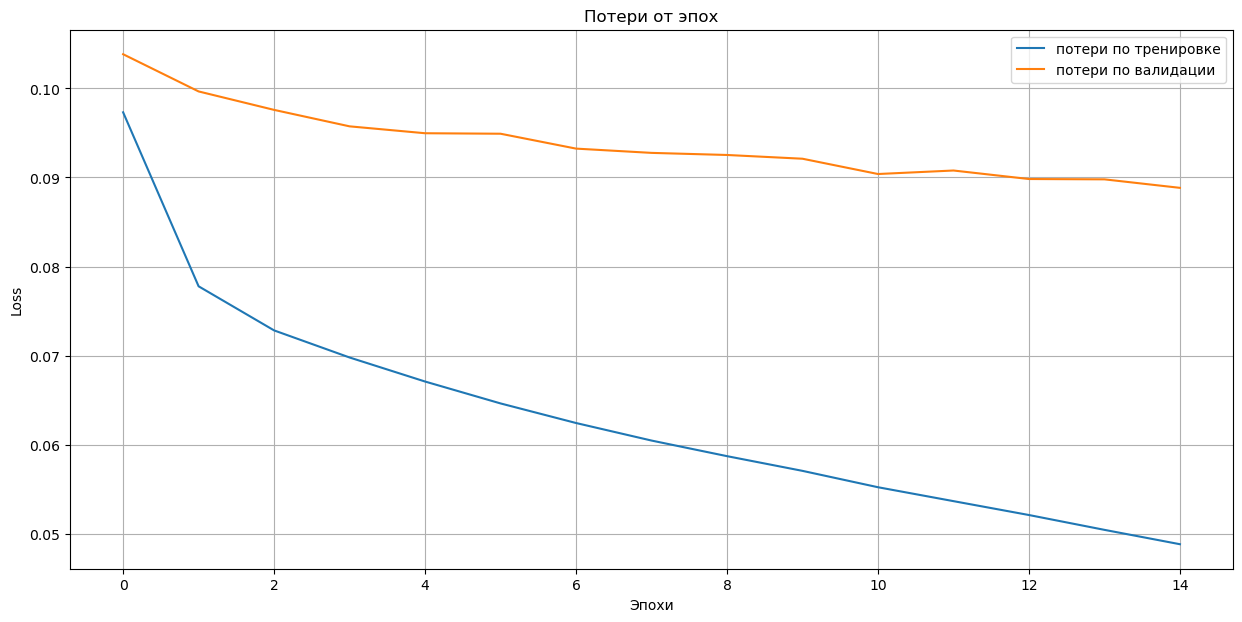

In [28]:
plt.figure(figsize=(15,7))
plt.plot(hh.history['loss'], label='потери по тренировке')
plt.plot(hh.history['val_loss'], label='потери по валидации')
plt.xlabel("Эпохи")
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.title("Потери от эпох")
plt.show()

**Эксперимент**

Эксперимент с разными оптимизаторами для одной начальной модели:

* создаем модель model
* сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
* создаем рабочую модель modeli куда будем загружать эти веса (она должна быть идентичной структуры)
* загружаем веса modeli.load_weights('model.h5')
* компилируем modeli с одним из оптимизаторов
* вычисляем ошибку для modeli без обучения (т.к. все модели начинают с одной точки, то все ошибки должны быть одинаковые, но будем контролировать это и считаем каждый раз заново)
* проводим обучение модели и пишем ошибки в истории hh
* выводим ошибки для 0-го момента и каждой эпохи обучения по тестовой и валидацинной частями данных

Оптимизаторы:

* SGD (с или без моментум)
* RMSprop()
* Adam() - адаптивные моменты
* Adagrad()

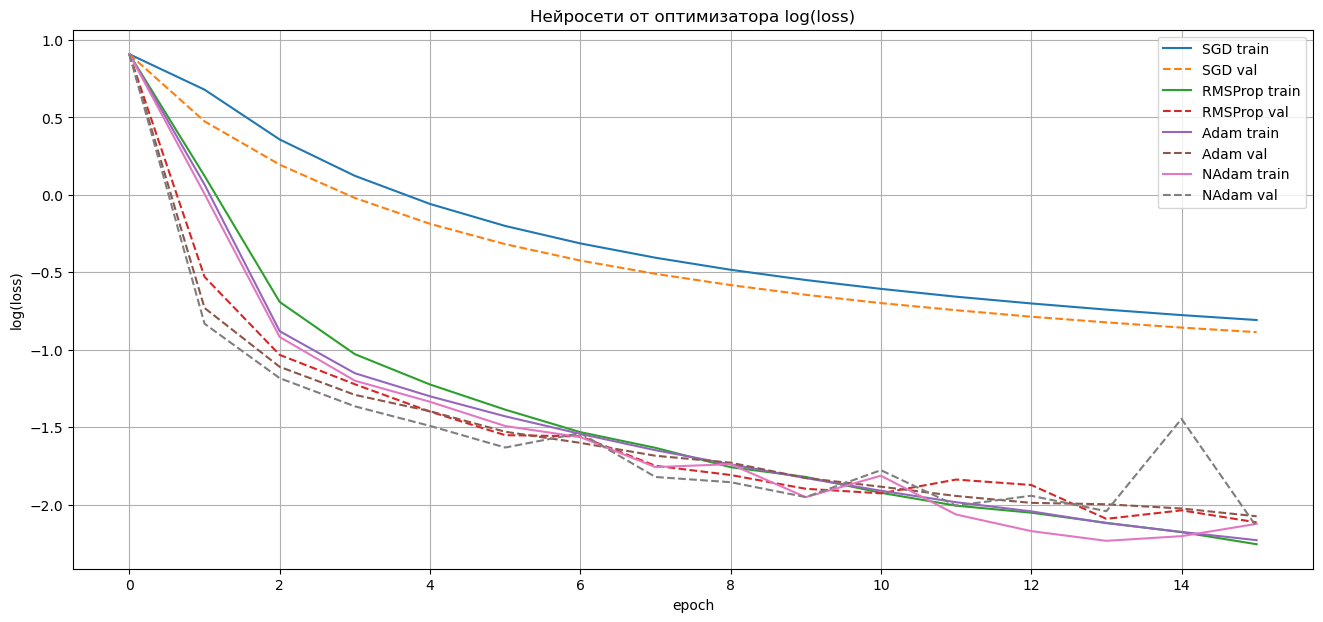

In [29]:
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='tanh'),
  Dense(10, activation='softmax'),
])

# сохраняем веса (это начальная точка)
model.save_weights('model.h5')
plt.figure(figsize=(16,7))

# число рабочих эпох
epochs= 15
# вектор для вывода результатов
epoch = np.arange(epochs+1)

# оптимизаторы:
for i_optim in ['SGD', 'RMSProp', 'Adam', 'NAdam']:
    # создаем контейнер с весами
    modeli = Sequential([
          Dense(64, activation='relu', input_shape=(784,)),
          Dense(64, activation='tanh'),
          Dense(10, activation='softmax'),
    ])
    modeli.load_weights("model.h5")
    # установка оптимизатора
    modeli.compile(
        optimizer=i_optim,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
    )
    # вычисляем ошибку для modeli без обучения
    hh0_tr = modeli.evaluate(train_images[:48000,:], to_categorical(train_labels[:48000]), verbose=0)
    hh0_val = modeli.evaluate(train_images[48000:,:], to_categorical(train_labels[48000:]), verbose=0)
    # обучение
    hh = modeli.fit(train_images, to_categorical(train_labels), epochs=epochs, batch_size=1024, validation_split=0.2, verbose=0)
    # картинки
    plt.plot(epoch, np.log([hh0_tr[0]] + hh.history['loss']), '-', label = i_optim + ' train')
    plt.plot(epoch, np.log([hh0_val[0]] + hh.history['val_loss']), '--', label = i_optim + ' val')

plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.title('Нейросети от оптимизатора log(loss)')
plt.show()

Посмотрим на результат предсказаний (inference) для обученной модели (последняя в цикле):

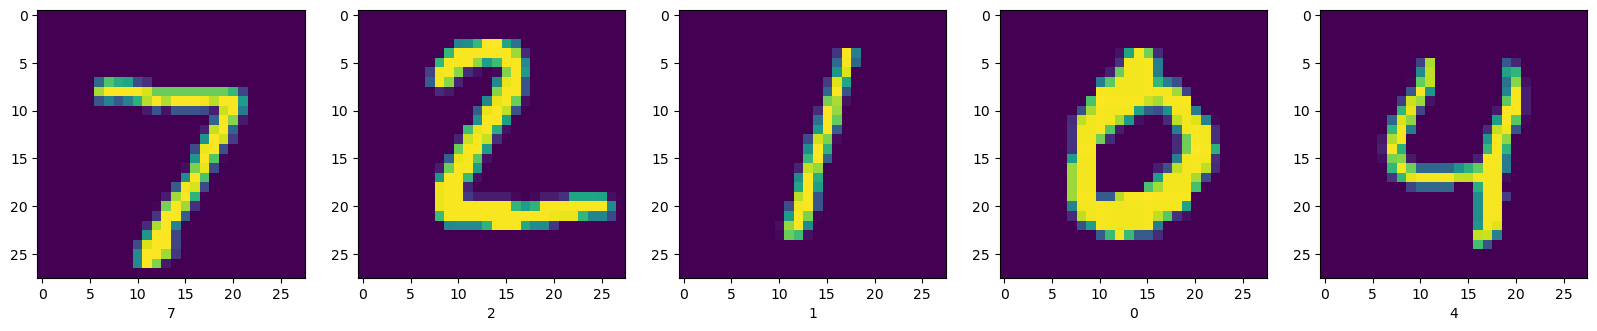

In [30]:
N = 5
y_pred = modeli.predict(test_images[:N,:])
y_pred_class = np.argmax(y_pred, axis=1)
plt.figure(figsize=(4*N, 8))
for i in range(N):
    plt.subplot(1, N, i+1)
    plt.imshow(test_images[i,:].reshape(28,28))
    plt.xlabel(str(y_pred_class[i]))
plt.show()

In [31]:
y_pred[0,:]

array([8.5357366e-05, 4.7516820e-05, 3.4220450e-04, 4.1954432e-04,
       4.0031018e-06, 2.1685933e-05, 3.0764173e-08, 9.9868673e-01,
       2.9092693e-05, 3.6379605e-04], dtype=float32)

Где ошиблись?

In [32]:
y_predi = modeli.predict(test_images)
yy = np.argmax(y_predi, axis=1)
np.where(testn_labels != yy)

(array([   8,  149,  233,  241,  247,  259,  290,  320,  321,  340,  412,
         445,  449,  495,  502,  551,  582,  583,  591,  610,  659,  684,
         691,  707,  740,  839,  900,  924,  938,  947,  951,  956,  965,
        1003, 1014, 1032, 1044, 1107, 1112, 1124, 1147, 1178, 1182, 1192,
        1194, 1202, 1224, 1226, 1232, 1242, 1247, 1253, 1256, 1260, 1283,
        1289, 1299, 1319, 1325, 1326, 1328, 1337, 1378, 1410, 1469, 1500,
        1522, 1527, 1530, 1549, 1553, 1609, 1640, 1681, 1709, 1717, 1721,
        1754, 1782, 1790, 1828, 1843, 1850, 1878, 1901, 1913, 1938, 1952,
        1984, 2004, 2016, 2024, 2035, 2040, 2043, 2044, 2053, 2093, 2098,
        2109, 2118, 2129, 2130, 2135, 2174, 2182, 2185, 2186, 2189, 2272,
        2293, 2299, 2325, 2369, 2371, 2387, 2406, 2422, 2488, 2514, 2598,
        2607, 2648, 2654, 2760, 2770, 2877, 2896, 2915, 2921, 2927, 2939,
        2952, 2953, 2995, 3005, 3060, 3073, 3114, 3117, 3130, 3157, 3206,
        3269, 3369, 3384, 3422, 3503, 

---

**Другой вариант:**

In [33]:
# # The full neural network code!
# ###############################
# import numpy as np
# import mnist
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.utils import to_categorical

# train_images = mnist.train_images()
# train_labels = mnist.train_labels()
# test_images = mnist.test_images()
# test_labels = mnist.test_labels()

# # Normalize the images.
# train_images = (train_images / 255) - 0.5
# test_images = (test_images / 255) - 0.5

# # Flatten the images.
# train_images = train_images.reshape((-1, 784))
# test_images = test_images.reshape((-1, 784))

# # Build the model.
# model = Sequential([
#   Dense(64, activation='relu', input_shape=(784,)),
#   Dense(64, activation='relu'),
#   Dense(10, activation='softmax'),
# ])

# # Compile the model.
# model.compile(
#   optimizer='adam',
#   loss='categorical_crossentropy',
#   metrics=['accuracy'],
# )

# # Train the model.
# model.fit(
#   train_images,
#   to_categorical(train_labels),
#   epochs=5,
#   batch_size=32,
# )

# # Evaluate the model.
# model.evaluate(
#   test_images,
#   to_categorical(test_labels)
# )

# # Save the model to disk.
# model.save_weights('model.h5')

# # Load the model from disk later using:
# # model.load_weights('model.h5')

# # Predict on the first 5 test images.
# predictions = model.predict(test_images[:5])

# # Print our model's predictions.
# print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# # Check our predictions against the ground truths.
# print(test_labels[:5]) # [7, 2, 1, 0, 4]

## Практическое задание

### Вариант 1
<ol>
    <li>Попробуйте обучить, нейронную сеть на Keras(рассмотренную на уроке) на датасете MNIST с другими параметрами. 
        Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?</li>
    <li>Поработайте с документацией Keras. Попробуйте найти полезные команды Keras неразобранные на уроке.</li>
</ol>

### Вариант 2

Используем набор примеров fashion-MNIST
<ol>
    <li>Опишите - какой результат получен в нейросети в зависимости от:
    <ul>
        <li>числа нейронов в слое (для 2х слойной сети).</li>
        <li>числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).</li>
        <li>фиксируйте для тренировочного и тестового набора метрики accuracy.</li>
    </ul></li>
    <li>Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy</li>
    <li>Сделайте вывод - что помогло улучшить качество классификации нейросети на тестовом наборе?</li>
    <li>Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность). Сделайте вывод.</li>
</ol>

Загрузка Fashion_MNIST

In [34]:
from keras.datasets import fashion_mnist

In [35]:
(train_imagef, train_labelf),(test_imagef, test_labelf) = fashion_mnist.load_data()

In [36]:
ind = np.where(train_labelf==2)[0]
ind

array([    5,     7,    27, ..., 59977, 59981, 59993], dtype=int64)

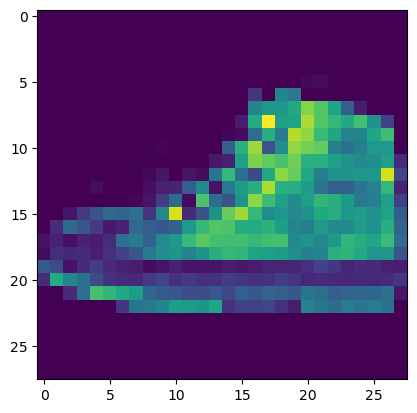

In [37]:
plt.imshow(train_imagef[5002,:,:])
plt.show()

## Дополнительные материалы

<ol>
    <li>https://keras.io/</li>
</ol>

## Используемая литература 

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>https://keras.io/</li>
    <li>Шакла Н. — Машинное обучение и TensorFlow 2019</li>
    <li>Википедия</li>
    
</ol>

---